# Assignment 3: Tree Search

__Notes:__

* Breaking ties: 
    * The order in which the children are explored (see `available directions`) makes a big difference for DFS and dealing with empty spaces. I explore the directions in random order which makes the algorithm stochastic!
    * Ties for $h(n)$ and $f(n)$ need to be broken in a consistent manner. I use the most recently added node. To try to keep moving into the same direction.
* Cycles: Cycles are avoided using the reached data structure. For DFS, we can use the reached structure for checking or, without a reached structure implement cycle checking with only parents. 
* Depth-limited search needs ideas from best-first search to work with open spaces!



Helper functions for the Maze Assignment by M. Hahsler
Usage: 
  import maze_helper as mh
  mh.show_some_mazes()
  
Here is an example maze:

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX

The goal is at (8, 1).
Position(0,0): X
Position(8,1):  


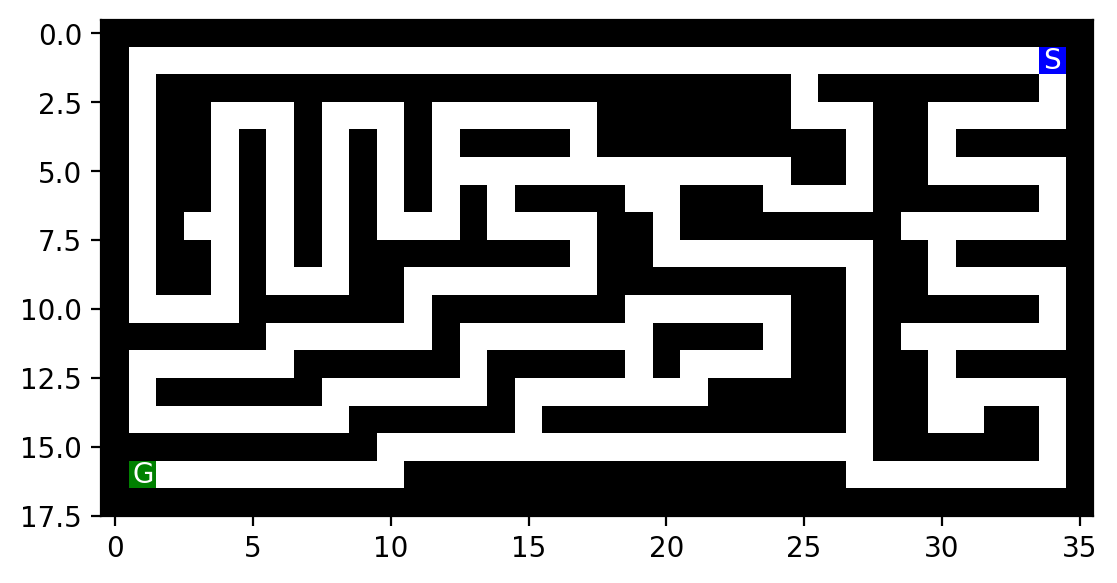

In [2]:
%run maze_helper.py
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

#f = open("small_maze.txt", "r")
f = open("medium_maze.txt", "r")
#f = open("large_maze.txt", "r")    # this has only one solution!
#f = open("open_maze.txt", "r")
#f = open("empty_maze.txt", "r")
#f = open("empty_2_maze.txt", "r")
#f = open("wall_maze.txt", "r")
#f = open("loops_maze.txt", "r")
#f = open("L_maze.txt", "r")

maze_str = f.read()
maze = parse_maze(maze_str)

# look at two positions in the maze
print("Position(0,0):", maze[0, 0])
print("Position(8,1):", maze[8, 1])

show_maze(maze)

In [3]:
import numpy as np
from matplotlib import colors
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')

# numpy comparison warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def maze_to_matrix(maze):  
    """convert a maze a numeric numpy array for visualization via imshow."""

    # make a deep copy first so the original maze is not changed
    maze = np.copy(maze)
    
    # Converts all tile types to integers
    maze[maze == ' '] = 0
    maze[maze == 'X'] = 1 # wall
    maze[maze == 'S'] = 2 # start
    maze[maze == 'G'] = 3 # goal
    maze[maze == 'P'] = 4 # position/final path
    maze[maze == '.'] = 5 # explored squares
    maze[maze == 'F'] = 6 # frontier
    maze = maze.astype(int)
    
    return(maze)
    
 
# Given a list of mazes, will return an animation of the search
# Based on show_maze but modified to generate animation
# Sadly I can not embed the animations in the PDF I have to submit :(
def animate_maze(result, repeat = False):
        """Build an animation from a list of mazes."""
        
        if result['path'] != None:       
            print(f"Path length: {len(result['path'])-1}")
            print(f"Reached squares: {len(result['reached'])}")
            print(f"Action sequence: {result['actions']}")
        else:
            print("No solution found.")
        
        
        mazes = result['maze_anim']
        
        cmap = colors.ListedColormap(['white', 'black', 'blue', 'green', 'red', 'gray', 'orange'])
 
        goal = find_pos(mazes[0], 'G')
        start = find_pos(mazes[0], 'S')
 
        mazes = [maze_to_matrix(m) for m in mazes]

        fig, ax = plt.subplots()
        im = ax.imshow(maze_to_matrix(mazes[0]), cmap = cmap, norm = colors.BoundaryNorm(list(range(cmap.N + 1)), cmap.N))
 
        plt.text(start[1], start[0], "S", fontsize = 10, color = "white",
                horizontalalignment = 'center',
                verticalalignment = 'center')
 
        plt.text(goal[1], goal[0], "G", fontsize = 10, color = "white",
                horizontalalignment = 'center',
                verticalalignment = 'center')

        def step(i):  
                im.set_array(maze_to_matrix(mazes[i]))
                return([im])
 
        ani = animation.FuncAnimation(
            fig, 
            step, 
            frames = len(mazes),
            repeat = repeat
        )
 
        plt.close()

        return ani


## Implementation

In [4]:
# tree_search.py has my actual implementation
from tree_search_solution import *
import tree_search_solution as tree_search

Directions are checked in the order ['N', 'E', 'S', 'W']


### Heuristics

Heuristics $h(n)$

In [5]:
def manhattan(pos1, pos2):
    """returns the Manhattan distance between two positions"""
    return(np.sum(np.abs(np.subtract(pos1, pos2))))
    
print(manhattan((0,0), (1,1)))

2


In [6]:
def euclidean(pos1, pos2):
    """returns the Euclidean distance between two positions"""
    return(np.sqrt(np.sum(np.square(np.subtract(pos1, pos2)))))

print(euclidean([0,0], [1,1]))

1.4142135623730951


In [7]:
tree_search.heuristic = manhattan
#tree_search.heuristic = euclidean

## Experiments

### BFS

I use a best-first search implementation with FIFO frontier.

In [8]:
tree_search.set_order("NESW")
#tree_search.set_order(random=True)
%time result = best_first_search(maze, strategy = "BFS", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked in the order ['N', 'E', 'S', 'W']
CPU times: user 40.9 ms, sys: 16.9 ms, total: 57.7 ms
Wall time: 23.3 ms
Path length: 68
Reached squares: 269
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'N', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


In [9]:
#tree_search.set_order("NESW")
tree_search.set_order(random=True)
%time result = best_first_search(maze, strategy = "BFS", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked at every step in random order.
CPU times: user 28.4 ms, sys: 64 µs, total: 28.5 ms
Wall time: 27.1 ms
Path length: 68
Reached squares: 269
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'N', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


### DFS

Use the best-first tree search implementation and just change the order in which the frontier is explored. 

__Important Notes:__ 
* This implementation keeps the whole search tree in memory (reached structure) and has space complexity of  $O(b^m)$ ($m$ is the longest path in the search tree) which is worse than BFS's  $O(b^d)$ ($d$ is the depth of the shallowest goal state)!
* The time complexity is worse than BFS (even though the runtime is better for this problem).

In [10]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
# We can alter the order in which the directions are added to the frontier

tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
#tree_search.set_order(random=True)


%time result = best_first_search(maze, strategy = "DFS", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked in the order ['N', 'E', 'S', 'W']
CPU times: user 25.5 ms, sys: 140 µs, total: 25.7 ms
Wall time: 24.3 ms
Path length: 152
Reached squares: 160
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'E', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N', 'E', 'E', 'S', 'S', 'S', 'S', 'E', 'E', 'N', 'N', 'E', 'E', 'S', 'S', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'N', 'E', 'E', 'E', 'E', 'E', 'N', 'N', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


In [11]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = best_first_search(maze, strategy = "DFS", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked in the order ['S', 'E', 'N', 'W']
CPU times: user 16.5 ms, sys: 45 µs, total: 16.6 ms
Wall time: 16 ms
Path length: 174
Reached squares: 181
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'E', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N', 'E', 'E', 'S', 'S', 'S', 'S', 'E', 'E', 'N', 'N', 'N', 'N', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'N', 'E', 'E', 'E', 'E', 'E', 'N', 'N', 'E', 'E', 'E', 'E', 'E', 'E', 'N', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W'

In [12]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = best_first_search(maze, strategy = "DFS", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked in the order ['W', 'S', 'E', 'N']
CPU times: user 33.8 ms, sys: 138 µs, total: 33.9 ms
Wall time: 32.5 ms
Path length: 244
Reached squares: 273
Action sequence: ['S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'N', 'N', 'N', 'E', 'E', 'E', 'E', 'S', 'E', 'E', 'E', 'N', 'N', 'N', 'W', 'W', 'N', 'N', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'E', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N', 'E', 'E', 'S', 'S', 'S', 'S', 'E', 'E', 'N', 'N', 'N', 'N', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'S', 'S', 'E', 

Directions are checked at every step in random order.
CPU times: user 8.71 ms, sys: 48 µs, total: 8.75 ms
Wall time: 8.59 ms
Path length: 152
Reached squares: 262


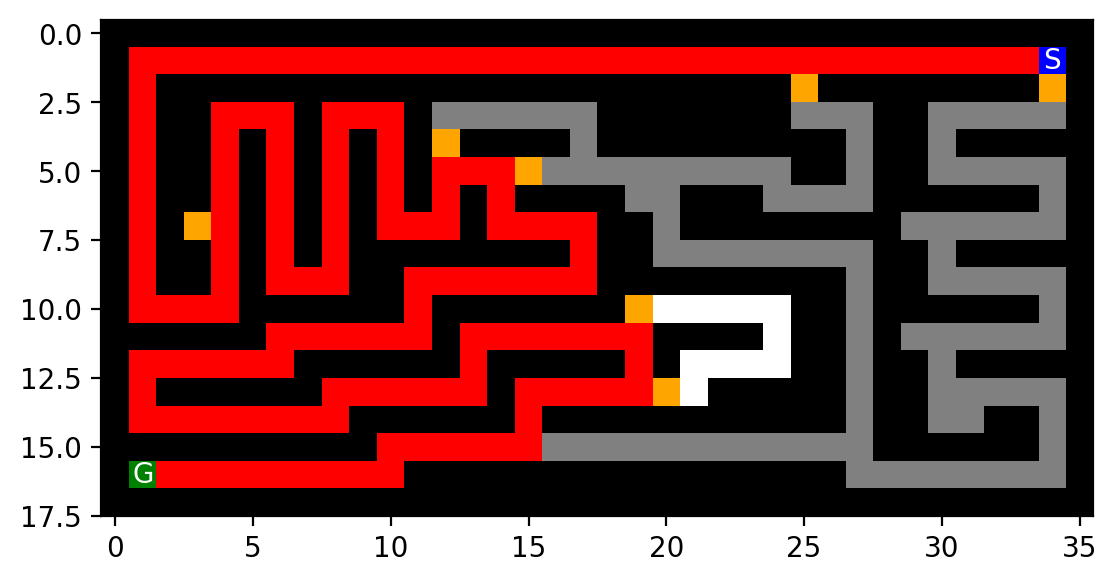

In [13]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
tree_search.set_order(random = True)

%time result = best_first_search(maze, strategy = "DFS", debug = False, vis = False)

show_path(maze, result)

### DFS with no reached data structure

This has space complexity $O(bm)$ instead of $O(b^m)$ when we reuse the tree search algorithm from BFS!

Since we cannot check all cycles, we still may get infinite loops. Here are possible solutions:
* Stop after a fixed number of tries and return no solution `max_tries`.
* IDS solves this problem.

In [14]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!

# Can get stuck for empy maze since cycle checking is not string enough! 
# I use a maximum number of tries and stop if the goal is not reached.
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = DFS(maze, vis = False, max_tries = 100000, debug_reached = True, animation = True)

animate_maze(result)

CPU times: user 38.6 ms, sys: 24.1 ms, total: 62.8 ms
Wall time: 20.7 ms
Path length: 70
Reached squares: 124
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'N', 'W', 'W', 'W', 'W', 'W', 'S', 'E', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


We could do a random walk and not check for cycles. This is guaranteed to reach eventually any square including the goal, 
but creates a long path. The path could be simplified leading to the [Tremaux's algorithm](https://en.wikipedia.org/wiki/Maze_solving_algorithm).

### Run randomized DFS multiple times and use the best solution.

__Note:__ IDS takes a similar amount of time and memory, but is guaranteed optimal.

Directions are checked at every step in random order.
CPU times: user 820 ms, sys: 3.64 ms, total: 824 ms
Wall time: 823 ms
Solutions have path_lengths of [68, 116, 130, 222, 164, 124, 110, 234, 70, 76, 74, 130, 104, 124, 122, 234, 68, 162, 74, 122, 74, 164, 74, 110, 116, 68, 76, 130, 152, 144, 114, 76, 76, 150, 70, 134, 130, 76, 70, 174, 234, 76, 74, 246, 248, 74, 236, 76, 68, 246, 134, 74, 104, 162, 234, 104, 74, 76, 116, 162, 124, 134, 74, 152, 234, 152, 236, 134, 144, 162, 76, 114, 74, 154, 130, 68, 74, 104, 134, 156, 76, 74, 74, 130, 162, 112, 76, 74, 154, 124, 156, 76, 76, 134, 164, 70, 164, 134, 68, 164]
Path length: 68
Reached squares: 0


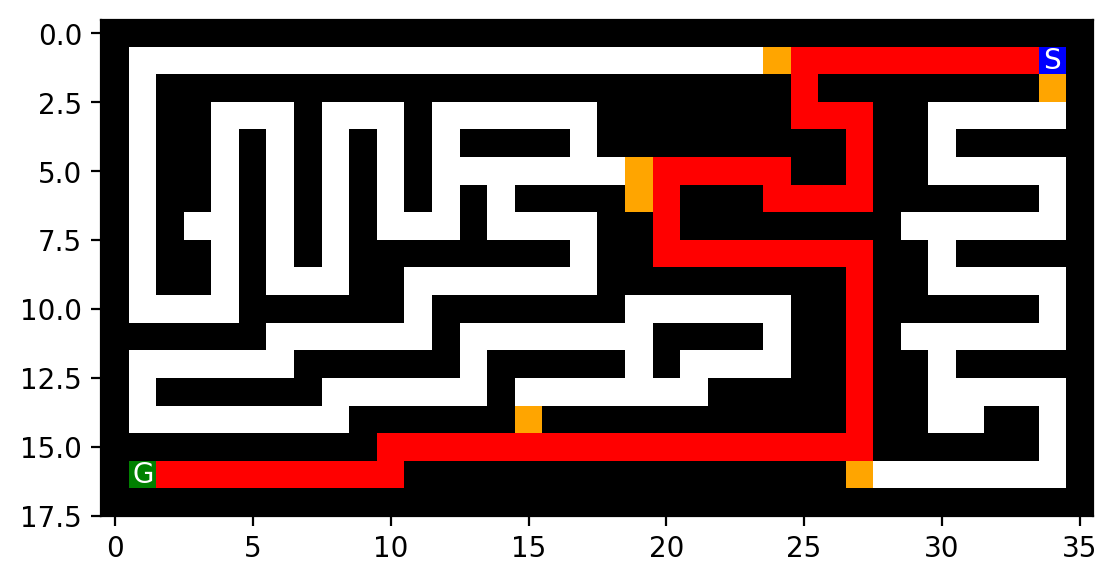

In [16]:
tree_search.set_order(random = True)

N = 100
%time results = [ DFS(maze, max_tries = 10000, vis = False) for _ in range(N) ]

# check if we found a solution and display the best solution
results = [ r for r in results if not r['path'] is None ]
if len(results) > 0:
    path_lengths = [ len(r['path'])-1 for r in results ]

    print(f"Solutions have path_lengths of {path_lengths}")

    result = results[min_index(path_lengths)]
    show_path(maze, result)
else:
    print("No solution found!")

### Depth limited DFS

DFS does not store the explored search tree for visualization so we show it using the tree search implementation.

In [17]:
tree_search.set_order(random = True)

#%time result = DFS(maze, limit = 10, debug = False, vis = False)
%time result = best_first_search(maze, strategy = "DFS", limit = 5, debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked at every step in random order.
CPU times: user 3.62 ms, sys: 258 µs, total: 3.88 ms
Wall time: 1.29 ms
No solution found.


Directions are checked in the order ['N', 'E', 'S', 'W']
CPU times: user 573 µs, sys: 43 µs, total: 616 µs
Wall time: 615 µs
Reached squares: 11


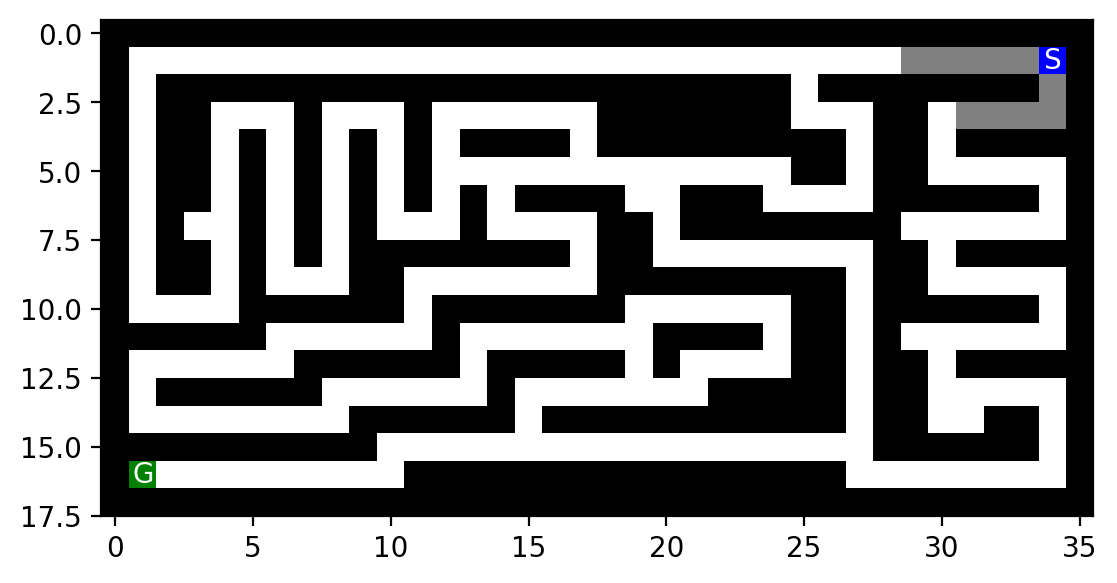

No solution found.


In [18]:
#tree_search.set_order(random=True)
tree_search.set_order("NESW")

%time result = DFS(maze, limit = 5, vis = False, debug_reached = True, animation = True)

show_path(maze, result)

animate_maze(result)

### IDS

__Notes:__ 

* IDS with DFS does not store reached squares, so gray areas are not shown!

* IDS depends on the cycle checking of DFS and therefore is also affected by these problems.

Directions are checked at every step in random order.
CPU times: user 243 ms, sys: 0 ns, total: 243 ms
Wall time: 242 ms
Path length: 68
Reached squares: 0


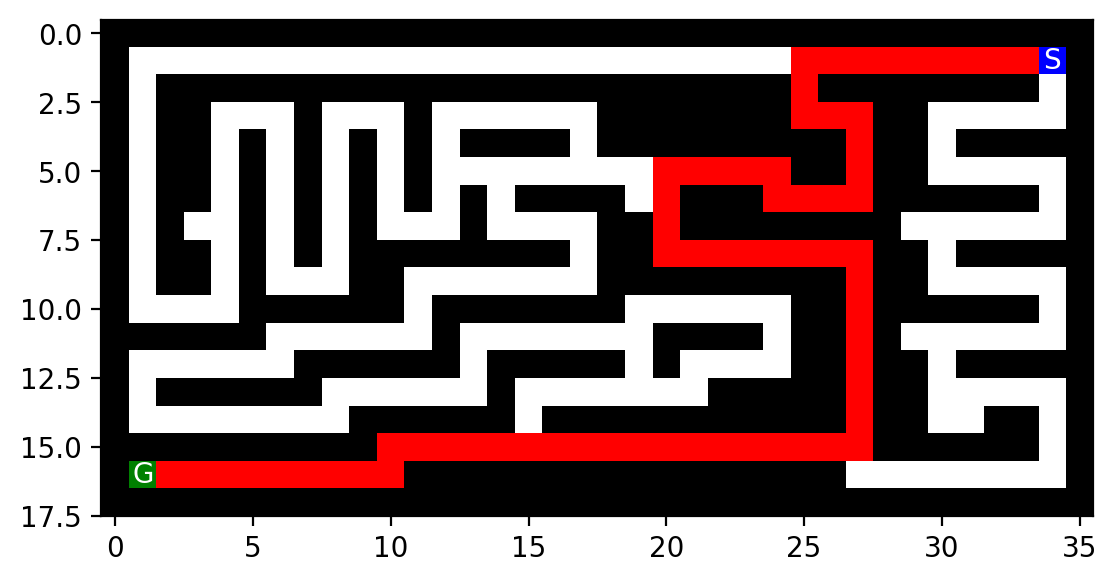

In [19]:
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
tree_search.set_order(random = True)

%time result = IDS(maze, max_tries = 100000)
show_path(maze, result)

Directions are checked at every step in random order.
CPU times: user 152 ms, sys: 41 µs, total: 152 ms
Wall time: 151 ms
Path length: 68
Reached squares: 268


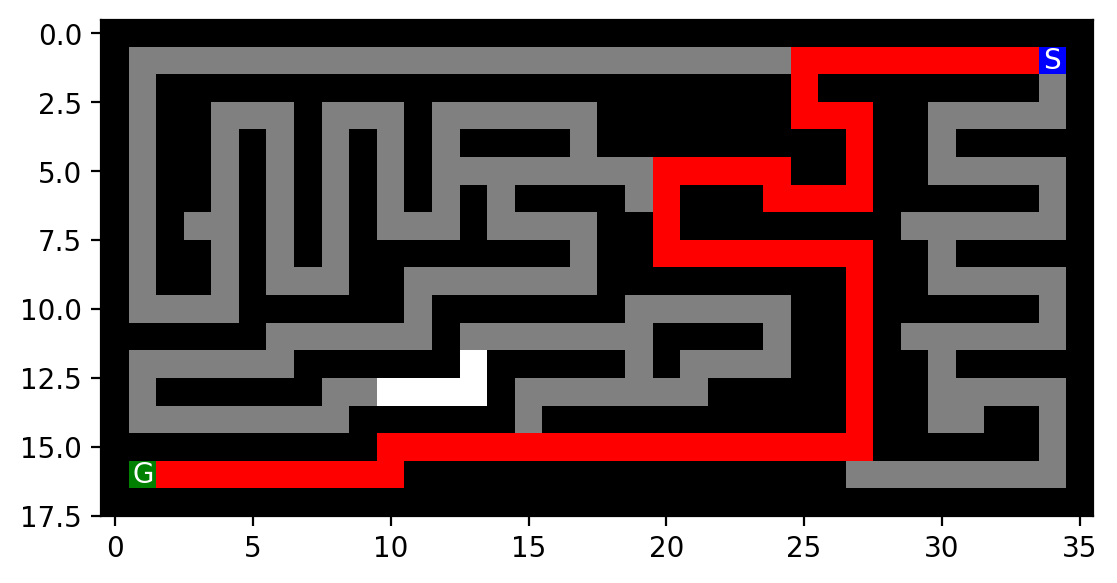

In [20]:
# Use a reached structure. This does not use DFS in the proper way.

#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
tree_search.set_order(random = True)

%time result = IDS_reached(maze, debug = False)
show_path(maze, result)

### GBFS

In [21]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = best_first_search(maze, strategy = "GBFS", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked in the order ['S', 'E', 'N', 'W']
CPU times: user 55.6 ms, sys: 19.9 ms, total: 75.5 ms
Wall time: 35.7 ms
Path length: 152
Reached squares: 163
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'E', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N', 'E', 'E', 'S', 'S', 'S', 'S', 'E', 'E', 'N', 'N', 'E', 'E', 'S', 'S', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'N', 'E', 'E', 'E', 'E', 'E', 'N', 'N', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


In [22]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = best_first_search(maze, strategy = "GBFS", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked in the order ['W', 'S', 'E', 'N']
CPU times: user 10.2 ms, sys: 185 µs, total: 10.4 ms
Wall time: 9.91 ms
Path length: 74
Reached squares: 81
Action sequence: ['S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'N', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


In [23]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
tree_search.set_order(random = True)

%time result = best_first_search(maze, strategy = "GBFS", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked at every step in random order.
CPU times: user 6.43 ms, sys: 202 µs, total: 6.63 ms
Wall time: 6.1 ms
Path length: 74
Reached squares: 81
Action sequence: ['S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'N', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


### A* Search

In [24]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = best_first_search(maze, strategy = "A*", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked in the order ['S', 'E', 'N', 'W']
CPU times: user 24 ms, sys: 5 µs, total: 24 ms
Wall time: 22.9 ms
Path length: 68
Reached squares: 223
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'N', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


In [25]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
tree_search.set_order("WSEN")
#tree_search.set_order(random = True)

%time result = best_first_search(maze, strategy = "A*", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked in the order ['W', 'S', 'E', 'N']
CPU times: user 48.1 ms, sys: 329 µs, total: 48.5 ms
Wall time: 46.4 ms
Path length: 68
Reached squares: 226
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'N', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


In [26]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
tree_search.set_order(random = True)

%time result = best_first_search(maze, strategy = "A*", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked at every step in random order.
CPU times: user 47.5 ms, sys: 0 ns, total: 47.5 ms
Wall time: 47 ms
Path length: 68
Reached squares: 224
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'N', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


### Weighted A* Search

$W > 1$ tends towards GBFS (optimality is not guaranteed)

In [27]:
tree_search.set_order(random=True)

%time result = best_first_search(maze, strategy = "A*", W = 1+1e-9, debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked at every step in random order.
CPU times: user 55.1 ms, sys: 226 µs, total: 55.3 ms
Wall time: 52.9 ms
Path length: 68
Reached squares: 225
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'N', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


In [28]:
%time result = best_first_search(maze, strategy = "A*", W = 2, debug = False, vis = False, animation = True)

animate_maze(result)

CPU times: user 27.2 ms, sys: 3.94 ms, total: 31.2 ms
Wall time: 29.8 ms
Path length: 68
Reached squares: 224
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'N', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


In [29]:
%time result = best_first_search(maze, strategy = "A*", W = 1000, debug = False, vis = False, animation = True)

animate_maze(result)

CPU times: user 7.68 ms, sys: 0 ns, total: 7.68 ms
Wall time: 7.19 ms
Path length: 74
Reached squares: 81
Action sequence: ['S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'N', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


$W<1$ tends towards Uniform-Cost Search/BFS (optimality is guaranteed)

In [30]:
%time result = best_first_search(maze, strategy = "A*", W = 1-1e-9, debug = False, vis = False, animation = True)

animate_maze(result)

CPU times: user 48.2 ms, sys: 0 ns, total: 48.2 ms
Wall time: 46.7 ms
Path length: 68
Reached squares: 227
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'N', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


In [31]:
%time result = best_first_search(maze, strategy = "A*", W = .1, debug = False, vis = False, animation = True)

animate_maze(result)

CPU times: user 39.6 ms, sys: 238 µs, total: 39.9 ms
Wall time: 37.8 ms
Path length: 68
Reached squares: 264
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'N', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']
